#**Download dataset from Kaggle & Read dataset**

In [1]:
pip install opendatasets --upgrade

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np

# Eric's Kaggle API key
# "username":"ericthedataguy",
# "key":"875c0de0faea2fefa081c78eb470a347"

od.download(
    "https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe")



Skipping, found downloaded files in "./515k-hotel-reviews-data-in-europe" (use force=True to force download)


In [3]:
df = pd.read_csv("515k-hotel-reviews-data-in-europe/Hotel_Reviews.csv")

In [4]:
df.shape

(515738, 17)

In [5]:
df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

Let's check for missing values

In [7]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

We have some missing values for latitide and longitude. Since we have around 515k columns so we will just drop the rows.

In [8]:
df.dropna(inplace = True)

In [9]:
df.shape

(512470, 17)

Now, the shape of our dataset is aroundn 512k

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512470 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               512470 non-null  object 
 1   Additional_Number_of_Scoring                512470 non-null  int64  
 2   Review_Date                                 512470 non-null  object 
 3   Average_Score                               512470 non-null  float64
 4   Hotel_Name                                  512470 non-null  object 
 5   Reviewer_Nationality                        512470 non-null  object 
 6   Negative_Review                             512470 non-null  object 
 7   Review_Total_Negative_Word_Counts           512470 non-null  int64  
 8   Total_Number_of_Reviews                     512470 non-null  int64  
 9   Positive_Review                             512470 non-null  object 
 

Now, lets convert the review)date to its appropriate datatype

In [11]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512470 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               512470 non-null  object        
 1   Additional_Number_of_Scoring                512470 non-null  int64         
 2   Review_Date                                 512470 non-null  datetime64[ns]
 3   Average_Score                               512470 non-null  float64       
 4   Hotel_Name                                  512470 non-null  object        
 5   Reviewer_Nationality                        512470 non-null  object        
 6   Negative_Review                             512470 non-null  object        
 7   Review_Total_Negative_Word_Counts           512470 non-null  int64         
 8   Total_Number_of_Reviews                     512470 non-null  int64        

In [13]:
df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194  2017-08-03            7.7  Hotel Arena   
1                           194  2017-08-03            7.7  Hotel Arena   
2                           194  2017-07-31            7.7  Hotel Arena   
3                           194  2017-07-31            7.7  Hotel Arena   
4                           194  2017-07-24            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

we can see that the days_since_review column has unneccesarily has the word 'days'in it. So lets remove it and convert it into int type

In [14]:
df['days_since_review'].unique()

array(['0 days', '3 days', '10 days', '17 days', '25 days', '26 days',
       '27 days', '28 days', '30 days', '31 days', '34 days', '35 days',
       '44 days', '45 days', '52 days', '54 days', '66 days', '68 days',
       '70 days', '73 days', '74 days', '79 days', '84 days', '86 days',
       '93 days', '98 days', '99 days', '105 day', '106 day', '107 day',
       '109 day', '111 day', '115 day', '120 day', '127 day', '134 day',
       '136 day', '137 day', '138 day', '140 day', '150 day', '164 day',
       '167 day', '170 day', '175 day', '178 day', '186 day', '188 day',
       '190 day', '196 day', '207 day', '217 day', '218 day', '225 day',
       '226 day', '227 day', '231 day', '232 day', '233 day', '234 day',
       '235 day', '236 day', '239 day', '261 day', '269 day', '270 day',
       '274 day', '276 day', '277 day', '281 day', '282 day', '283 day',
       '294 day', '295 day', '296 day', '301 day', '303 day', '310 day',
       '318 day', '319 day', '325 day', '328 day', '3

In [15]:
df['days_since_review'] = df['days_since_review'].str.extract('(\d+)').astype(int)

In [16]:
print(df['days_since_review'].unique())

[  0   3  10  17  25  26  27  28  30  31  34  35  44  45  52  54  66  68
  70  73  74  79  84  86  93  98  99 105 106 107 109 111 115 120 127 134
 136 137 138 140 150 164 167 170 175 178 186 188 190 196 207 217 218 225
 226 227 231 232 233 234 235 236 239 261 269 270 274 276 277 281 282 283
 294 295 296 301 303 310 318 319 325 328 337 355 369 372 373 379 382 385
 390 394 397 400 402 412 413 424 428 432 438 443 453 457 459 464 466 467
 468 471 473 478 483 485 492 498 501 504 505 506 509 519 520 521 530 534
 535 540 541 542 543 546 547 548 549 555 558 562 566 569 576 578 579 581
 586 590 597 599 604 609 613 618 625 627 628 631 632 636 639 641 643 644
 647 648 650 651 652 654 655 656 659 669 673 674 675 677 678 683 685 691
 692 696 698 700 702 704 707 708 709 714 716 720 723 728 730  12  15  22
  24  39  40  47  51  59  80  91  92  94  97 101 114 121 143 146 149 152
 169 171 176 179 181 182 185 191 193 194 211 212 219 240 248 249 288 289
 304 340 341 342 354 359 360 361 366 370 376 380 39

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512470 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               512470 non-null  object        
 1   Additional_Number_of_Scoring                512470 non-null  int64         
 2   Review_Date                                 512470 non-null  datetime64[ns]
 3   Average_Score                               512470 non-null  float64       
 4   Hotel_Name                                  512470 non-null  object        
 5   Reviewer_Nationality                        512470 non-null  object        
 6   Negative_Review                             512470 non-null  object        
 7   Review_Total_Negative_Word_Counts           512470 non-null  int64         
 8   Total_Number_of_Reviews                     512470 non-null  int64        

In [18]:
# checking the unique number of Hotel_names with rating greater than 9
df[df['Average_Score'] > 9.0].Hotel_Name.nunique()

225

In [19]:
# unique hotel names with the topmost reviews
df[df['Average_Score'] > 9.0].Hotel_Address.unique()

array(['1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom',
       '1 Aldwych Westminster Borough London WC2B 4BZ United Kingdom',
       '1 Kensington Court Kensington and Chelsea London W8 5DL United Kingdom',
       '1 Suffolk Place Westminster Borough London SW1Y 4HX United Kingdom',
       '1 Waterview Drive Greenwich London SE10 0TW United Kingdom',
       '10 Avenue D I na 16th arr 75016 Paris France',
       '10 Beaufort Gardens Kensington and Chelsea London SW3 1PT United Kingdom',
       '10 Berners Street Westminster Borough London W1T 3NP United Kingdom',
       '10 Bis rue du D barcad re 17th arr 75017 Paris France',
       '10 Harrington Road Kensington and Chelsea London SW7 3ER United Kingdom',
       '10 Monmouth Street Camden London WC2H 9HB United Kingdom',
       '10 Palace Place Westminster Borough London SW1E 5BW United Kingdom',
       '10 rue de Bruxelles 9th arr 75009 Paris France',
       '10 Rue Kepler 16th arr 75016 Paris France',

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Now, let us just create a simple word cloud to see which words are more occuring for the postive and negative reviews

In [21]:
# sampling only 10 rows of data
df = df.sample(n = 10000)

In [22]:
df

Hotel_Address  \
173686  4 18 Harrington Gardens Kensington and Chelsea...   
42644     129 Bayswater Road London W2 4RJ United Kingdom   
430888  Robert Stolz Platz 1 01 Innere Stadt 1010 Vien...   
243936  78 82 Westbourne Terrace Westminster Borough L...   
367385  Largo Augusto 10 Milan City Center 20122 Milan...   
...                                                   ...   
127491  27 Devonshire Terrace Westminster Borough Lond...   
447463  Schottenring 3 01 Innere Stadt 1010 Vienna Aus...   
7551    1 Aldwych Westminster Borough London WC2B 4BZ ...   
178563   4 rue Salomon de Caus 3rd arr 75003 Paris France   
485052  Via Panfilo Castaldi 7 Central Station 20124 M...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
173686                          1444  2016-03-31            7.8   
42644                            153  2016-01-03            7.8   
430888                           299  2016-02-08            8.3   
243936                           441  2016-03-20            7.5   
367385                           398  2015-09-03            8.7   
...                              ...         ...            ...   
127491                          1243  2016-09-15            8.1   
447463                           416  2015-10-26            8.5   
7551                              60  2017-04-25            9.2   
178563                           166  2015-10-09            8.2   
485052                            85  2016-08-20            7.7   

                                Hotel_Name        Reviewer_Nationality  \
173686  Millennium Gloucester Hotel London             United Kingdom    
42644              Hilton London Hyde Park             United Kingdom    
430888                  Le Meridien Vienna             United Kingdom    
243936         Park Grand London Hyde Park             United Kingdom    
367385      NH Collection Milano President                New Zealand    
...                                    ...                         ...   
127491         Park Grand Paddington Court   United States of America    
447463                Hotel de France Wien                     Canada    
7551                           One Aldwych             United Kingdom    
178563                 Little Palace Hotel                     Turkey    
485052              Mokinba Hotels Baviera             United Kingdom    

                                          Negative_Review  \
173686          Tables in dining room too close together    
42644    Bed was a little too hard but that s just own...   
430888                                        No Negative   
243936   Bathroom very dark lighting not brilliant whe...   
367385                                        No Negative   
...                                                   ...   
127491   The bed was too hard After a long day sightse...   
447463                                        No Negative   
7551                                          No Negative   
178563   The room is small looking over a wall it is d...   
485052   Older rooms are dank and dingy had to change ...   

        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
173686                                  9                     5726   
42644                                  15                      646   
430888                                  0                     2393   
243936                                 15                     1891   
367385                                  0                     3754   
...                                   ...                      ...   
127491                                 24                     6608   
447463                                  0                     5177   
7551                                    0                      259   
178563                                 13                     1377   
485052                                 67                     1240   

                                          P

In [23]:
# for positive reviews
positive_reviews = " ".join(df['Positive_Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

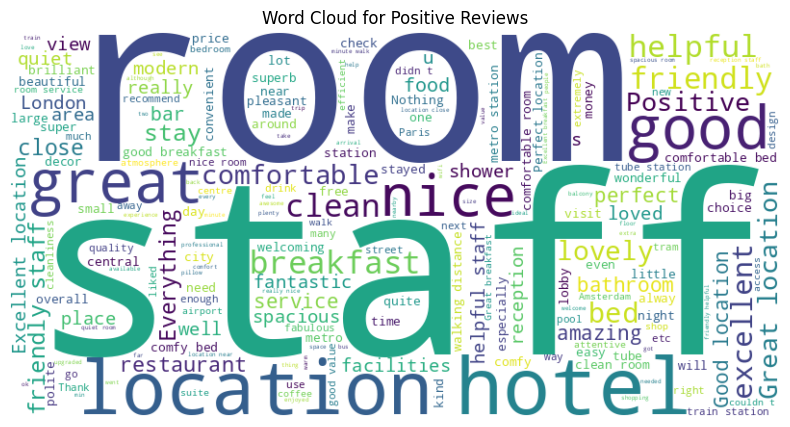

In [24]:
# plotting the graph
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

We can see some of the most common words are great location, staff, positive, friendly, great, etc.

In [25]:
# for negative reviews
negative_reviews = " ".join(df['Negative_Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)


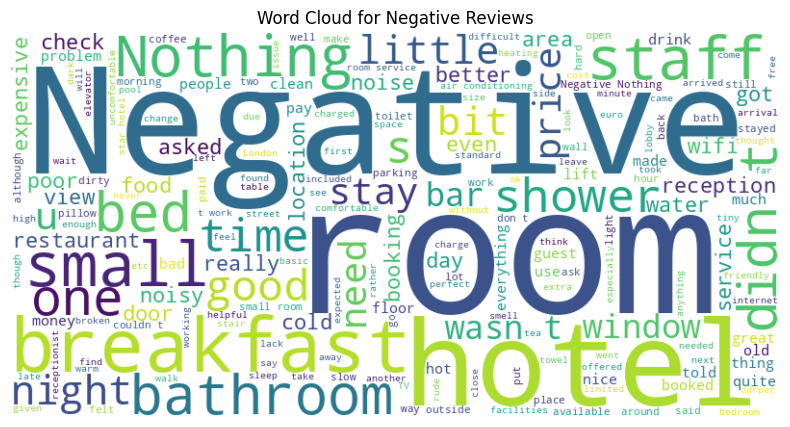

In [26]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

We can see some of the most common words are negative, nothing, bathroom, small room, price, etc

Lets also visualize for the tags column

In [27]:
#tag analsis
tags_data = df['Tags']

# Concatenate all tags into a single string
all_tags = ' '.join(tags_data.dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

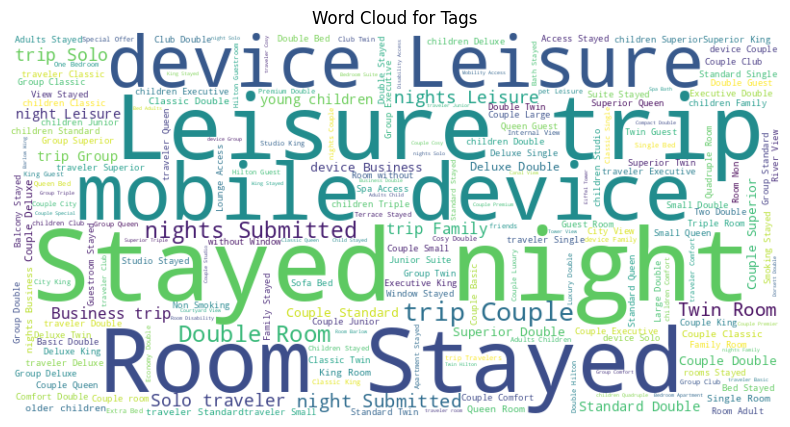

In [28]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Tags')
plt.axis('off')
plt.show()

We can see some of the most common words that occured in the tags column are leisure, trip couple, double room, etc.

#**KMeans Clustering**

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

Since kmeans algorithm is for numeric values only let's subset the numeric features

In [30]:
# Separate numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [31]:
numeric_data= df[numerical_columns]
numeric_data.head()

Additional_Number_of_Scoring  Average_Score  \
173686                          1444            7.8   
42644                            153            7.8   
430888                           299            8.3   
243936                           441            7.5   
367385                           398            8.7   

        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
173686                                  9                     5726   
42644                                  15                      646   
430888                                  0                     2393   
243936                                 15                     1891   
367385                                  0                     3754   

        Review_Total_Positive_Word_Counts  \
173686                                 10   
42644                                  18   
430888                                 13   
243936                                  3   
367385                                 17   

        Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
173686                                          11             8.8   
42644                                            1             8.3   
430888                                           1            10.0   
243936                                           1             7.1   
367385                                           4             9.6   

        days_since_review        lat        lng  
173686                490  51.493508  -0.183435  
42644                 578  51.510460  -0.187584  
430888                542  48.202730  16.366121  
243936                501  51.515732  -0.180218  
367385                700  45.463068   9.197937

In [32]:
numeric_data.shape

(10000, 10)

In [33]:
numeric_data.lat.nunique()

1318

In [34]:
numeric_data.lng.nunique()

1318

So we have 10 features for our kmeans clustering. Let's normalize the features

In [35]:
# Standardize the data
sc = StandardScaler()
normalized_data = sc.fit_transform(numeric_data)

In [36]:
df_normalized = pd.DataFrame(normalized_data, columns=numeric_data.columns)

In [37]:
df_normalized

Additional_Number_of_Scoring  Average_Score  \
0                         1.874570      -1.052188   
1                        -0.689078      -1.052188   
2                        -0.399153      -0.155961   
3                        -0.117172      -1.589924   
4                        -0.202560       0.561020   
...                            ...            ...   
9995                      1.475428      -0.514452   
9996                     -0.166816       0.202529   
9997                     -0.873755       1.457247   
9998                     -0.663262      -0.335207   
9999                     -0.824111      -1.231434   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                             -0.308853                 1.278947   
1                             -0.107547                -0.892925   
2                             -0.610811                -0.146023   
3                             -0.107547                -0.360645   
4                             -0.610811                 0.435850   
...                                 ...                      ...   
9995                           0.194411                 1.656031   
9996                          -0.610811                 1.044230   
9997                          -0.610811                -1.058380   
9998                          -0.174649                -0.580398   
9999                           1.637099                -0.638970   

      Review_Total_Positive_Word_Counts  \
0                             -0.342497   
1                             -0.001856   
2                             -0.214757   
3                             -0.640557   
4                             -0.044437   
...                                 ...   
9995                           0.849744   
9996                          -0.044437   
9997                          -0.597977   
9998                           0.296204   
9999                          -0.427657   

      Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                       0.337405        0.242578   
1                                      -0.568598       -0.066391   
2                                      -0.568598        0.984103   
3                                      -0.568598       -0.807916   
4                                      -0.296798        0.736928   
...                                          ...             ...   
9995                                   -0.568598        0.736928   
9996                                   -0.206197        0.984103   
9997                                   -0.568598        0.984103   
9998                                    0.428005       -0.560741   
9999                                   -0.568598       -1.858410   

      days_since_review       lat       lng  
0              0.641676  0.578605 -0.652096  
1              1.060440  0.583567 -0.653028  
2              0.889127 -0.384576  3.061585  
3              0.694022  0.585110 -0.651375  
4              1.640998 -1.186451  1.453061  
...                 ...       ...       ...  
9995          -0.157781  0.584473 -0.651326  
9996           1.388788 -0.381084  3.060840  
9997          -1.214207  0.583954 -0.637731  
9998           1.469686 -0.189984 -0.082704  
9999          -0.034055 -1.181998  1.453474  

[10000 rows x 10 columns]

Now lets find the optimal number of k for the clustering

In [38]:
pip install kneed

In [39]:
from kneed import KneeLocator

In [40]:
# find the optimal value of k
wcss = []

k_values = range(1, 11)

for i in k_values:
    kmeans = KMeans(n_clusters= i, init='random',  n_init= 'auto')
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

In [41]:
# Use KneeLocator to find the knee in the curve
knee_locator = KneeLocator(k_values, wcss, curve="convex", direction="decreasing")

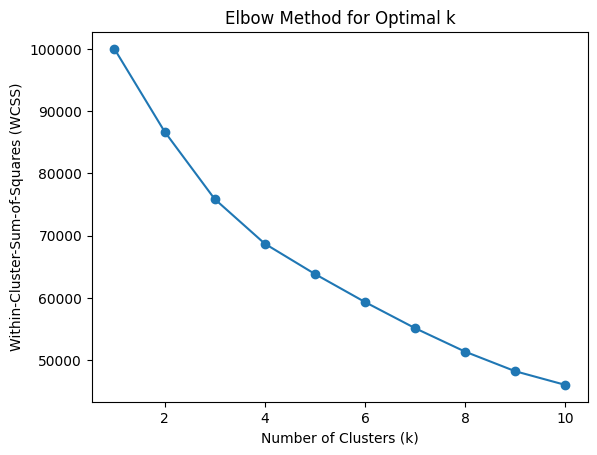

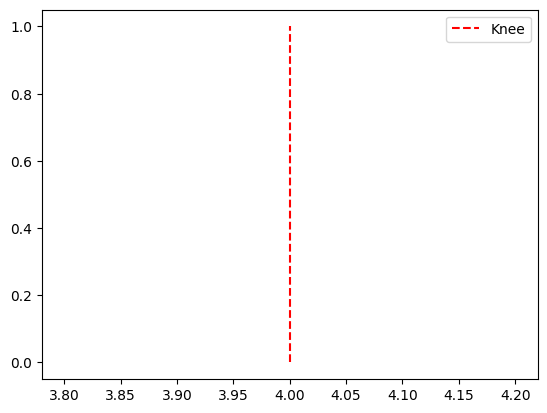

In [42]:
# elbow plot for best value of k
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()

# Mark the knee point
plt.vlines(knee_locator.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Knee')
plt.legend()

In [43]:
optimal_k = knee_locator.knee
print(f'Optimal Number of Clusters (k): {optimal_k}')

Optimal Number of Clusters (k): 4


Now, lets perform kmeans clustering with our optimal cluster number of 4

In [44]:
# Kmeans clustering
kmeans = KMeans(n_clusters = optimal_k, init='random',  n_init= 'auto')
df_normalized['Cluster'] = kmeans.fit_predict(df_normalized)

In [45]:
df_normalized.head()

Additional_Number_of_Scoring  Average_Score  \
0                      1.874570      -1.052188   
1                     -0.689078      -1.052188   
2                     -0.399153      -0.155961   
3                     -0.117172      -1.589924   
4                     -0.202560       0.561020   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                          -0.308853                 1.278947   
1                          -0.107547                -0.892925   
2                          -0.610811                -0.146023   
3                          -0.107547                -0.360645   
4                          -0.610811                 0.435850   

   Review_Total_Positive_Word_Counts  \
0                          -0.342497   
1                          -0.001856   
2                          -0.214757   
3                          -0.640557   
4                          -0.044437   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                    0.337405        0.242578   
1                                   -0.568598       -0.066391   
2                                   -0.568598        0.984103   
3                                   -0.568598       -0.807916   
4                                   -0.296798        0.736928   

   days_since_review       lat       lng  Cluster  
0           0.641676  0.578605 -0.652096        2  
1           1.060440  0.583567 -0.653028        0  
2           0.889127 -0.384576  3.061585        1  
3           0.694022  0.585110 -0.651375        3  
4           1.640998 -1.186451  1.453061        1

In [46]:
# Print the counts of each cluster
print(df_normalized['Cluster'].value_counts())


0    4580
1    2317
3    1967
2    1136
Name: Cluster, dtype: int64


We can see that cluster 3 has the highest number of points and cluster 0 has the lowest among all.

In [47]:
import seaborn as sns

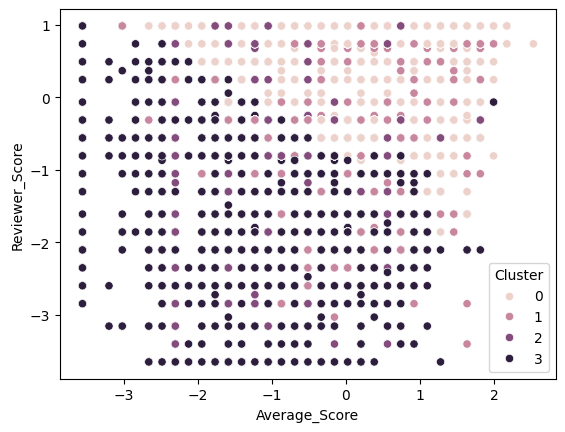

In [48]:
# 2D Plot
sns.scatterplot(data = df_normalized, x ='Average_Score', y = 'Reviewer_Score', hue = 'Cluster' )
plt.show()

We can see from the scatter plot that cluster 2 and cluster 3 are located at the lower left traingle corner.

<Axes: xlabel='lat', ylabel='lng'>

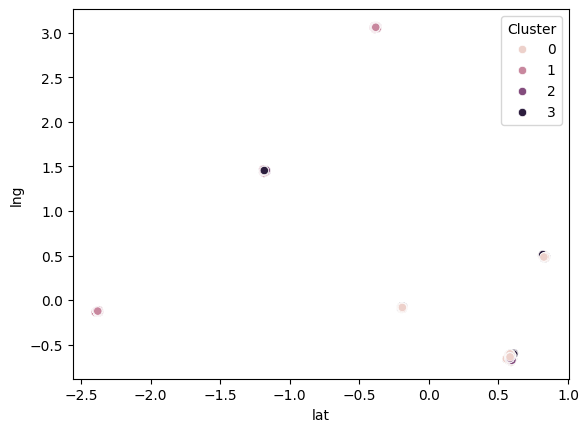

In [49]:
sns.scatterplot(x = 'lat', y = 'lng', hue='Cluster', data = df_normalized)


From this graph, we can see that most of the hotels are located somewhat in the same regions that is nearby and overlap one another.

In [50]:
# Visualize the clusters in 3D using plotly
fig = px.scatter_3d(df_normalized, x = 'Average_Score', y ='Review_Total_Negative_Word_Counts' , z = 'Review_Total_Positive_Word_Counts', color='Cluster',
                    title='KMeans Clustering ')
fig.update_traces(marker_size = 3)
fig.show()

From the 3d graph, we can see that most of the points are located at the edge of the grid. Wecan see some of the outliers as well.

#**Kmeans++ clustering**

Now,  lets try another algorithm to ensure a smarter initialization of the centroids and improves the quality of the clustering. Let' try kmeans++.

In [51]:
# drop the cluster label from previous clustering
df_normalized.drop(['Cluster'], axis = 1 )

Additional_Number_of_Scoring  Average_Score  \
0                         1.874570      -1.052188   
1                        -0.689078      -1.052188   
2                        -0.399153      -0.155961   
3                        -0.117172      -1.589924   
4                        -0.202560       0.561020   
...                            ...            ...   
9995                      1.475428      -0.514452   
9996                     -0.166816       0.202529   
9997                     -0.873755       1.457247   
9998                     -0.663262      -0.335207   
9999                     -0.824111      -1.231434   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                             -0.308853                 1.278947   
1                             -0.107547                -0.892925   
2                             -0.610811                -0.146023   
3                             -0.107547                -0.360645   
4                             -0.610811                 0.435850   
...                                 ...                      ...   
9995                           0.194411                 1.656031   
9996                          -0.610811                 1.044230   
9997                          -0.610811                -1.058380   
9998                          -0.174649                -0.580398   
9999                           1.637099                -0.638970   

      Review_Total_Positive_Word_Counts  \
0                             -0.342497   
1                             -0.001856   
2                             -0.214757   
3                             -0.640557   
4                             -0.044437   
...                                 ...   
9995                           0.849744   
9996                          -0.044437   
9997                          -0.597977   
9998                           0.296204   
9999                          -0.427657   

      Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                       0.337405        0.242578   
1                                      -0.568598       -0.066391   
2                                      -0.568598        0.984103   
3                                      -0.568598       -0.807916   
4                                      -0.296798        0.736928   
...                                          ...             ...   
9995                                   -0.568598        0.736928   
9996                                   -0.206197        0.984103   
9997                                   -0.568598        0.984103   
9998                                    0.428005       -0.560741   
9999                                   -0.568598       -1.858410   

      days_since_review       lat       lng  
0              0.641676  0.578605 -0.652096  
1              1.060440  0.583567 -0.653028  
2              0.889127 -0.384576  3.061585  
3              0.694022  0.585110 -0.651375  
4              1.640998 -1.186451  1.453061  
...                 ...       ...       ...  
9995          -0.157781  0.584473 -0.651326  
9996           1.388788 -0.381084  3.060840  
9997          -1.214207  0.583954 -0.637731  
9998           1.469686 -0.189984 -0.082704  
9999          -0.034055 -1.181998  1.453474  

[10000 rows x 10 columns]

In [52]:
df_normalized.head()

Additional_Number_of_Scoring  Average_Score  \
0                      1.874570      -1.052188   
1                     -0.689078      -1.052188   
2                     -0.399153      -0.155961   
3                     -0.117172      -1.589924   
4                     -0.202560       0.561020   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                          -0.308853                 1.278947   
1                          -0.107547                -0.892925   
2                          -0.610811                -0.146023   
3                          -0.107547                -0.360645   
4                          -0.610811                 0.435850   

   Review_Total_Positive_Word_Counts  \
0                          -0.342497   
1                          -0.001856   
2                          -0.214757   
3                          -0.640557   
4                          -0.044437   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                    0.337405        0.242578   
1                                   -0.568598       -0.066391   
2                                   -0.568598        0.984103   
3                                   -0.568598       -0.807916   
4                                   -0.296798        0.736928   

   days_since_review       lat       lng  Cluster  
0           0.641676  0.578605 -0.652096        2  
1           1.060440  0.583567 -0.653028        0  
2           0.889127 -0.384576  3.061585        1  
3           0.694022  0.585110 -0.651375        3  
4           1.640998 -1.186451  1.453061        1

Now, let us use the elbow method to find the optimal value of k

In [53]:
# find the optimal value of k
wcss = []

k_values = range(1, 11)

for i in k_values:
    kmeansplusplus = KMeans(n_clusters= i, init='k-means++', n_init= 'auto' )
    kmeansplusplus.fit(df_normalized)
    wcss.append(kmeansplusplus.inertia_)

In [54]:
# Use KneeLocator to find the knee in the curve
knee_locator = KneeLocator(k_values, wcss, curve="convex", direction="decreasing")

In [55]:
optimal_k = knee_locator.knee
print(f'Optimal Number of Clusters (k): {optimal_k}')

Optimal Number of Clusters (k): 5


We can see that the optimal  value is 5, Now lets proceed with the clustering.

In [56]:
# Apply KMeans++ clustering
kmeans_plusplus = KMeans(n_clusters = optimal_k, init='k-means++', random_state=42, n_init= 'auto')
df_normalized['Cluster'] = kmeans_plusplus.fit_predict(df_normalized)


In [57]:
# Print the counts of each cluster
print(df_normalized['Cluster'].value_counts())


1    4573
3    2302
0    1763
4    1122
2     240
Name: Cluster, dtype: int64


We can see this time also the cluster points are unevenly assigned to different clusters.

In [59]:
# Visualize the clusters in 3D using plotly
fig = px.scatter_3d(df_normalized, x = 'Average_Score', y ='Review_Total_Negative_Word_Counts' , z = 'Review_Total_Positive_Word_Counts', color='Cluster',
                    title='KMeans Plus Plus Clustering ')
fig.update_traces(marker_size = 3)
fig.show()

#**Hierarchical Clustering**

Now we will perform hierarchical clustering.

In [60]:
from scipy.cluster.hierarchy import linkage, fcluster

In [61]:
df_normalized.drop(['Cluster'], axis = 1, inplace = True )

In [62]:
Z3 = linkage(df_normalized, 'ward')
df_normalized['cluster_labels'] = fcluster(Z3,t= 4 ,criterion='maxclust')

In [63]:
df_normalized['cluster_labels'].value_counts()

3    4400
1    2332
2    1953
4    1315
Name: cluster_labels, dtype: int64

Now let us do a pairplot for the latitude, longitude and average score columns wrt to the different cluster labels.

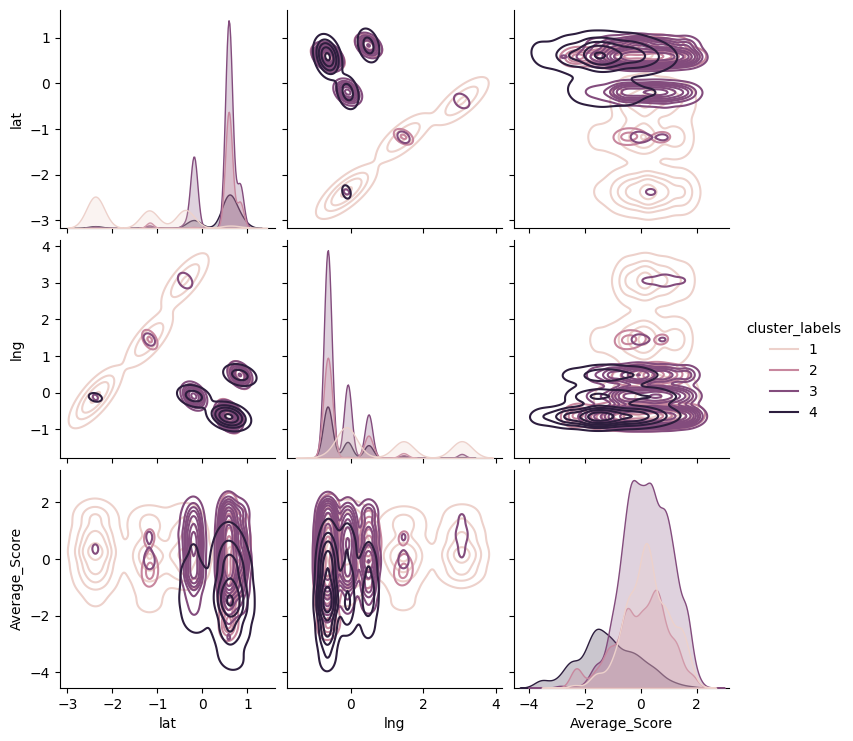

In [64]:
sns.pairplot(df_normalized[['lat','lng','Average_Score', 'cluster_labels']], hue="cluster_labels", kind='kde')

In [65]:
# Visualize the clusters in 3D using plotly
fig = px.scatter_3d(df_normalized, x = 'Average_Score', y ='Review_Total_Negative_Word_Counts' , z = 'Review_Total_Positive_Word_Counts', color='cluster_labels',
                    title='Hierarchical Clustering')
fig.update_traces(marker_size = 3)
fig.show()

#**DBSCAN Clustering**

Now let's use a last clustering algorithm, DBSCAN.

In [66]:
from sklearn.cluster import DBSCAN

In [67]:
df_normalized.drop(['cluster_labels'], axis = 1, inplace = True  )

In [68]:
dbscan = DBSCAN(eps=0.5, min_samples= 11)
df_normalized['Cluster_DBSCAN'] = dbscan.fit_predict(df_normalized)


In [69]:
df_normalized['Cluster_DBSCAN'].value_counts()

-1    9863
 3      74
 0      26
 2      15
 4      11
 1      11
Name: Cluster_DBSCAN, dtype: int64

We can see how cluster -1 has most of the data points and other clusters have very few data points. So, the 3d graph will be dominated by just one color.

In [70]:
# Visualize the clusters in 3D using plotly
fig = px.scatter_3d(df_normalized, x = 'Average_Score', y ='Review_Total_Negative_Word_Counts' , z = 'Review_Total_Positive_Word_Counts', color='Cluster_DBSCAN',
                    title='DBSCAN Clustering')
fig.update_traces(marker_size = 3)
fig.show()

#**PCA**

Now, let us try dimensionality reduction using PCA.

In [77]:
df_normalized.drop(['Cluster_DBSCAN'], axis = 1 , inplace = True)

In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA()
pca.fit(df_normalized)
pca.components_.shape


(10, 10)

In [80]:
df_components = pd.DataFrame(pca.components_, columns = df_normalized.columns)

In [81]:
df_components

Additional_Number_of_Scoring  Average_Score  \
0                      0.586582      -0.307088   
1                     -0.302273      -0.404301   
2                      0.188137       0.050654   
3                      0.001397       0.134671   
4                     -0.031052       0.024493   
5                     -0.017219      -0.023839   
6                      0.110295       0.766597   
7                      0.049441      -0.142986   
8                      0.028818       0.330705   
9                     -0.715859       0.053723   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                           0.146622                 0.510806   
1                           0.470068                -0.249163   
2                           0.162788                 0.464419   
3                           0.511982                -0.058124   
4                           0.177689                -0.127270   
5                          -0.096691                -0.083606   
6                           0.402969                 0.020562   
7                          -0.077075                 0.032536   
8                          -0.509561                -0.014851   
9                          -0.003693                 0.658059   

   Review_Total_Positive_Word_Counts  \
0                          -0.098579   
1                          -0.197601   
2                           0.159731   
3                           0.718432   
4                           0.249555   
5                          -0.208560   
6                          -0.429210   
7                           0.063219   
8                           0.339887   
9                          -0.007847   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                   -0.087702       -0.258712   
1                                   -0.005207       -0.629569   
2                                    0.368353       -0.056323   
3                                   -0.059964        0.052821   
4                                    0.474056        0.018545   
5                                    0.787289       -0.016491   
6                                   -0.028770       -0.124617   
7                                    0.086310        0.045303   
8                                    0.007574       -0.715900   
9                                   -0.010642       -0.006152   

   days_since_review       lat       lng  
0           0.013491  0.333854 -0.288472  
1          -0.007402 -0.138030  0.087106  
2           0.040199 -0.465935  0.580321  
3          -0.399891  0.113990 -0.144644  
4           0.763200  0.208456 -0.193354  
5          -0.504673  0.215711 -0.134073  
6           0.028378 -0.078347 -0.172729  
7          -0.013832 -0.724717 -0.656664  
8          -0.005506  0.012862 -0.040518  
9           0.006193  0.133778 -0.182909

We have 10 features so let us see the PCA for all the 10 features.

In [82]:
var_ratio = pca.explained_variance_ratio_
var_df = pd.DataFrame(var_ratio, columns=['Explained Variance Ratio'], index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
print(var_df)


      Explained Variance Ratio
PC1                   0.218146
PC2                   0.150207
PC3                   0.121654
PC4                   0.113614
PC5                   0.098535
PC6                   0.094682
PC7                   0.078115
PC8                   0.067717
PC9                   0.046337
PC10                  0.010992


Let us do a scree plot to see how many features we need to capture 85% variance of the dataset.

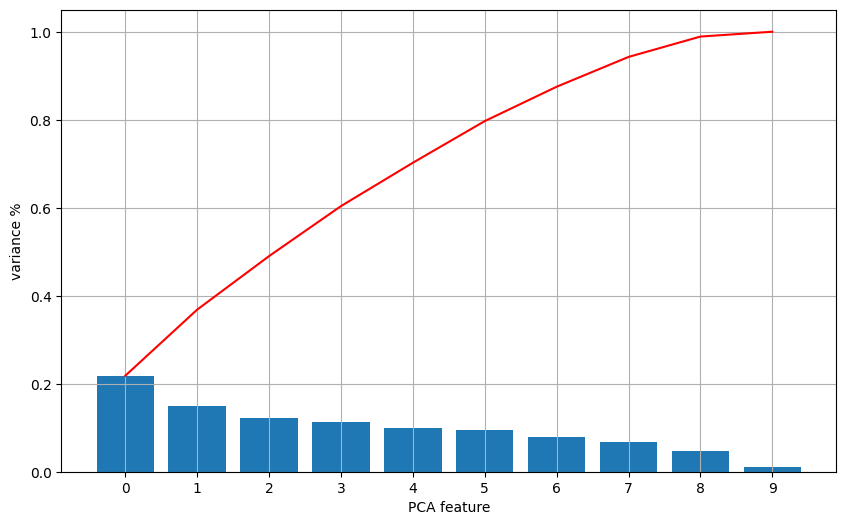

In [83]:
component_ids = range(pca.n_components_)

plt.figure(figsize=(10, 6))
plt.bar(component_ids, pca.explained_variance_ratio_)
plt.plot(component_ids, np.cumsum(pca.explained_variance_ratio_), color='red')
plt.xticks(component_ids)
plt.ylabel('variance %')
plt.xlabel('PCA feature')
plt.grid()
plt.show()




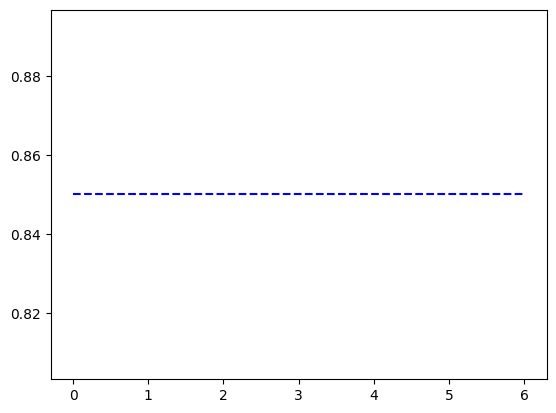

In [86]:
#find the coordinates where the variance is >85%
cross_idx = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.85)

#getting the 85% variance lines
plt.hlines(y=0.85, xmin=0, xmax=cross_idx, color='blue', linestyle='dashed')



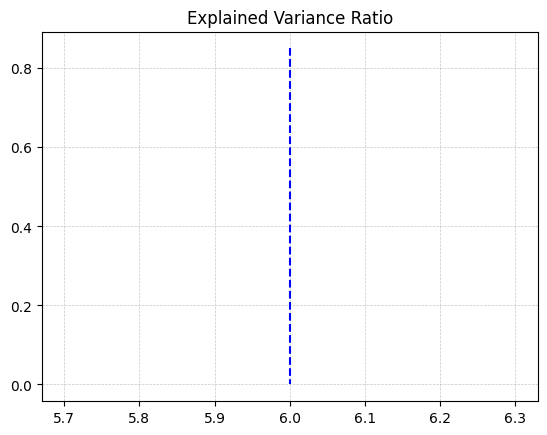

In [87]:
# Plotting vertical line down to x-axis
plt.vlines(x=cross_idx, ymin=0.85, ymax=0, color='blue', linestyle='dashed')

plt.title('Explained Variance Ratio')
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.7)
plt.show()

In [84]:
fig = px.line(pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)))
fig.show()

So, from all the plotted graphs we can see that 6 features captures 85% of the variance for the dataset.<br>
Now, let us plot the top 3 PCAs.

In [85]:
df_numeric_corrected_transformed_3D = pd.DataFrame(pca.transform(df_normalized)[:, 0:3], columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(df_numeric_corrected_transformed_3D, x='PC1', y='PC2', z='PC3',)
fig.update_traces(marker_size = 3)
fig.show()